In [1]:
%%capture

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd

data_url = "./data/my_data.csv"
data = pd.read_csv(data_url)

data.head()

,department,telecommuting,has_company_logo,has_questions,employment_type,industry,function,fraudulent,Country,len_profile,len_description,requirement_is_existed
0,Marketing,0,1,0,Other,NaN,Marketing,0,US,885,905,True
1,etc,0,1,0,Full-time,Marketing and Advertising,Customer Service,0,NZ,1286,2077,True
2,etc,0,1,0,NaN,NaN,NaN,0,US,879,355,False
3,Sales,0,1,0,Full-time,Computer Software,Sales,0,US,614,2600,True
4,etc,0,1,1,Full-time,Hospital & Health Care,Health Care Provider,0,US,1628,1520,True


In [3]:
data.columns

Index(['department', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'industry', 'function', 'fraudulent', 'Country',
       'len_profile', 'len_description', 'requirement_is_existed'],
      dtype='object')

In [4]:
print(data.dtypes)
data.describe(include='all').T

department                object
telecommuting              int64
has_company_logo           int64
has_questions              int64
employment_type           object
industry                  object
function                  object
fraudulent                 int64
Country                   object
len_profile                int64
len_description            int64
requirement_is_existed      bool
dtype: object


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
department,17880,11,etc,14504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
telecommuting,17880.0,NaN,NaN,NaN,0.042897,0.202631,0.0,0.0,0.0,0.0,1.0
has_company_logo,17880.0,NaN,NaN,NaN,0.795302,0.403492,0.0,1.0,1.0,1.0,1.0
has_questions,17880.0,NaN,NaN,NaN,0.491723,0.499945,0.0,0.0,0.0,1.0,1.0
employment_type,14409,5,Full-time,11620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
industry,12977,131,Information Technology and Services,1734,NaN,NaN,NaN,NaN,NaN,NaN,NaN
function,11425,37,Information Technology,1749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fraudulent,17880.0,NaN,NaN,NaN,0.048434,0.214688,0.0,0.0,0.0,0.0,1.0
Country,17880,12,US,10656,NaN,NaN,NaN,NaN,NaN,NaN,NaN
len_profile,17880.0,NaN,NaN,NaN,620.901454,567.4541,0.0,138.0,570.0,879.0,6178.0


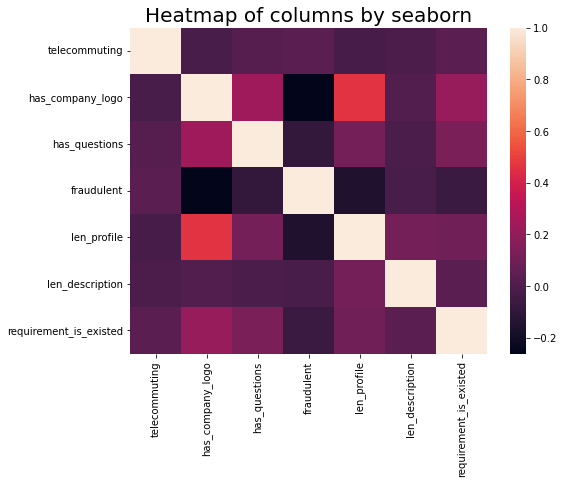

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(data.corr())

plt.title('Heatmap of columns by seaborn', fontsize=20)
plt.show()

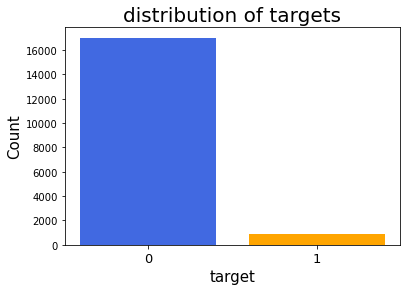

In [74]:
counts_target = data.fraudulent.value_counts()
label = ['0', '1']
index = range(len(label))
colors = ['royalblue', 'orange']

plt.bar(index, counts_target,
    color=colors)
plt.title("distribution of targets", fontsize=20)
plt.xlabel("target", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(index, label, fontsize=13)
plt.show()


In [6]:
# data split train/valid/test
from sklearn.model_selection import train_test_split

target = 'fraudulent'

train, test = train_test_split(data, test_size=0.2, random_state=2)
train, val = train_test_split(train, test_size=len(test), 
                              stratify=train[target], random_state=2)

train.shape, val.shape, test.shape

((10728, 12), (3576, 12), (3576, 12))

In [7]:
features = data.columns.drop([target, "has_company_logo"]).tolist()

x_train = train[features]
y_train = train[target]
x_val = val[features]
y_val = val[target]
x_test = test[features]

In [9]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline

pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=2, 
        n_jobs=-1, class_weight="balanced")) 
])

pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('ordinalencoder',
                                  OrdinalEncoder(cols=['department',
                                                       'employment_type',
                                                       'industry', 'function',
                                                       'Country'],
                                                 mapping=[{'col': 'department',
                                                           'data_type': dtype('O'),
                                                           'mapping': etc             1
Sales           2
Operations      3
Marketing       4
Product         5
IT              6
Engineering     7
Design          8
Technology      9
Development    10
Service        11
NaN            -2
dtype: int64},
                                                          {'col': 'employment_type'...
Distribution              30
Data Analyst              31
Training       

In [10]:
from sklearn.metrics import classification_report

# 검증셋 정확도
print('검증 정확도', pipe.score(x_val, y_val))

print(classification_report(y_val, pipe.predict(x_val)))

검증 정확도 0.9731543624161074
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3403
           1       0.82      0.57      0.67       173

    accuracy                           0.97      3576
   macro avg       0.90      0.78      0.83      3576
weighted avg       0.97      0.97      0.97      3576



In [11]:
pipe.named_steps

{'preprocessing': Pipeline(steps=[('ordinalencoder',
                  OrdinalEncoder(cols=['department', 'employment_type',
                                       'industry', 'function', 'Country'],
                                 mapping=[{'col': 'department',
                                           'data_type': dtype('O'),
                                           'mapping': etc             1
 Sales           2
 Operations      3
 Marketing       4
 Product         5
 IT              6
 Engineering     7
 Design          8
 Technology      9
 Development    10
 Service        11
 NaN            -2
 dtype: int64},
                                          {'col': 'employment_type',
                                           'data_type': dtype('O'),
                                           'mapping'...
 Quality Assurance         24
 Business Development      25
 Project Management        26
 Advertising               27
 Production                28
 Science                   2

In [13]:
# Permutation(순열) Importance
import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['rf'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
x_val_transformed = pipe.named_steps['preprocessing'].transform(x_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(x_val_transformed, y_val);

feature_names = x_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0226 ± 0.0019,len_profile
0.0144 ± 0.0027,len_description
0.0117 ± 0.0013,industry
0.0107 ± 0.0020,function
0.0100 ± 0.0041,requirement_is_existed
0.0099 ± 0.0032,has_questions
0.0084 ± 0.0013,Country
0.0069 ± 0.0022,employment_type
0.0049 ± 0.0021,department
0.0007 ± 0.0010,telecommuting


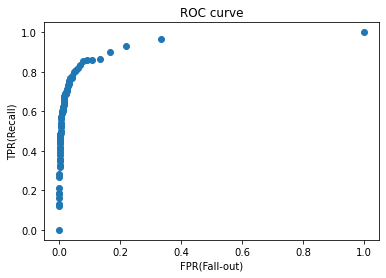

In [14]:
# ROC Curve, AUC Score
from sklearn.metrics import roc_curve

y_pred_proba = pipe.predict_proba(x_val)[:, 1]
# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [15]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.9461152094632583

In [16]:
# 과적합된 상태
from sklearn.metrics import f1_score

y_train_pred = pipe.predict(x_train)
y_val_pred = pipe.predict(x_val)

print('훈련 f1 score: ', f1_score(y_train, y_train_pred, average='binary'))
print('검증 f1 score: ', f1_score(y_val, y_val_pred, average='binary'))

훈련 f1 score:  0.9990375360923965
검증 f1 score:  0.6734693877551021


/mnt/d/anaconda3/envs/py_ML/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/mnt/d/anaconda3/envs/py_ML/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/mnt/d/anaconda3/envs/py_ML/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/mnt/d/anaconda3/envs/py_ML/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/mnt/d/a

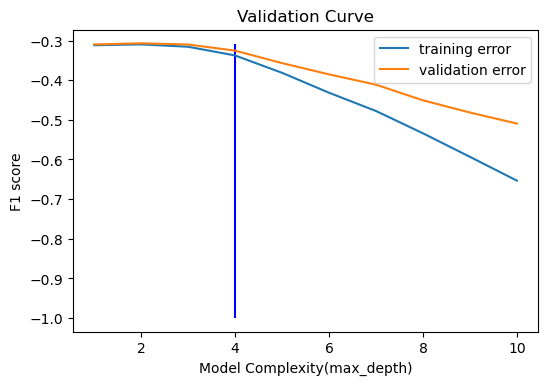

In [77]:
# validation curve
import numpy as np
from sklearn.model_selection import validation_curve

max_depth = range(1, len(x_train.columns)+1)

ts, vs = validation_curve(
    pipe, x_train, y_train
    , param_name='rf__max_depth'
    , param_range=max_depth, scoring='f1'
    , cv=3
    , n_jobs=-1
)

train_scores_mean = np.mean(-ts, axis=1)
validation_scores_mean = np.mean(-vs, axis=1)

fig, ax = plt.subplots()

# 훈련세트 검증곡선
ax.plot(max_depth, train_scores_mean, label='training error')

# 검증세트 검증곡선
ax.plot(max_depth, validation_scores_mean, label='validation error')

# 이상적인 max_depth
ax.vlines(4,-1, train_scores_mean.max(), color='blue')

# 그래프 셋팅
ax.set(title='Validation Curve'
      , xlabel='Model Complexity(max_depth)', ylabel='F1 score')
ax.legend()
fig.dpi = 100

In [81]:
# tune Hyperparameter

from sklearn.model_selection import RandomizedSearchCV

dists = {
    'rf__n_estimators': range(50, 510, 10),
    'rf__max_depth': range(1, len(x_train.columns)+1), 
    # 'rf__min_samples_leaf': range(3, 10, 2)
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=5, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)

clf.fit(x_train, y_train);
print('최적 하이퍼파라미터: ', clf.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/mnt/d/anaconda3/envs/py_ML/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/mnt/d/anaconda3/envs/py_ML/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/mnt/d/anaconda3/envs/py_ML/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/mnt/d/anaconda3/envs/py_ML/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/mnt/d/a

최적 하이퍼파라미터:  {'rf__n_estimators': 190, 'rf__max_depth': 10}


In [82]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T

,8,13,5,22,34,29,7,11,27,9,...,15,41,31,40,23,43,48,30,10,36
mean_fit_time,2.581084,1.475794,5.769179,4.478202,4.557005,1.622332,2.634606,0.914343,1.702946,2.114128,...,3.771349,3.068088,2.709803,0.970178,4.108048,2.439321,1.161041,1.95742,1.865069,0.582491
std_fit_time,0.107922,0.043669,0.056124,0.065895,0.164965,0.080264,0.10708,0.03712,0.104476,0.079523,...,0.15511,0.064228,0.075886,0.095302,0.158267,0.06925,0.012723,0.071207,0.043735,0.031771
mean_score_time,0.334346,0.204002,0.559856,0.436282,0.466058,0.199846,0.401602,0.166401,0.215985,0.256799,...,0.470574,0.337149,0.325969,0.193828,0.446686,0.340871,0.237237,0.289328,0.237516,0.137698
std_score_time,0.043246,0.029857,0.068846,0.036311,0.041372,0.030359,0.035528,0.011965,0.013031,0.021066,...,0.061321,0.040716,0.020592,0.017829,0.038024,0.01229,0.041337,0.039818,0.02723,0.01317
param_rf__n_estimators,190,110,430,360,380,130,200,70,140,160,...,340,320,290,100,440,330,160,250,220,60
param_rf__max_depth,10,10,10,10,10,9,9,9,9,9,...,3,3,3,2,2,1,1,1,1,1
params,"{'rf__n_estimators': 190, 'rf__max_depth': 10}","{'rf__n_estimators': 110, 'rf__max_depth': 10}","{'rf__n_estimators': 430, 'rf__max_depth': 10}","{'rf__n_estimators': 360, 'rf__max_depth': 10}","{'rf__n_estimators': 380, 'rf__max_depth': 10}","{'rf__n_estimators': 130, 'rf__max_depth': 9}","{'rf__n_estimators': 200, 'rf__max_depth': 9}","{'rf__n_estimators': 70, 'rf__max_depth': 9}","{'rf__n_estimators': 140, 'rf__max_depth': 9}","{'rf__n_estimators': 160, 'rf__max_depth': 9}",...,"{'rf__n_estimators': 340, 'rf__max_depth': 3}","{'rf__n_estimators': 320, 'rf__max_depth': 3}","{'rf__n_estimators': 290, 'rf__max_depth': 3}","{'rf__n_estimators': 100, 'rf__max_depth': 2}","{'rf__n_estimators': 440, 'rf__max_depth': 2}","{'rf__n_estimators': 330, 'rf__max_depth': 1}","{'rf__n_estimators': 160, 'rf__max_depth': 1}","{'rf__n_estimators': 250, 'rf__max_depth': 1}","{'rf__n_estimators': 220, 'rf__max_depth': 1}","{'rf__n_estimators': 60, 'rf__max_depth': 1}"
split0_test_score,0.549451,0.554745,0.548736,0.542857,0.544803,0.524917,0.530612,0.522034,0.518519,0.52381,...,0.310421,0.309735,0.309735,0.305677,0.30303,0.298507,0.29661,0.290456,0.294118,0.302376
split1_test_score,0.480519,0.470968,0.464968,0.471338,0.463492,0.468085,0.472727,0.455385,0.464832,0.454545,...,0.270642,0.270642,0.270642,0.278027,0.281818,0.276786,0.276786,0.289474,0.276786,0.276786
split2_test_score,0.513889,0.516129,0.501718,0.506944,0.506944,0.496774,0.490196,0.493506,0.5,0.495177,...,0.319328,0.318658,0.318658,0.317992,0.317328,0.313402,0.312115,0.305835,0.307692,0.321353


In [83]:
# 위에서 찾은 최적 하이퍼파라미터를 적용한 모델 생성.  
pipe_cv = clf.best_estimator_

# 위 최적 모델에 훈련/검증 데이터 넣고 스코어 추출. 
y_val_pred = pipe_cv.predict(x_val)
y_train_pred = pipe_cv.predict(x_train)

print('훈련 f1 score: ', f1_score(y_train, y_train_pred, average='binary'))
print('검증 f1 score: ', f1_score(y_val, y_val_pred, average='binary'))

훈련 f1 score:  0.6290018832391714
검증 f1 score:  0.5086705202312138


In [86]:
y_test = test[target]

print('test score :', pipe.score(x_test, y_test))
print('test score(After CV) :', pipe_cv.score(x_test, y_test))

print(classification_report(y_test, pipe.predict(x_test)))
print(classification_report(y_test, pipe_cv.predict(x_test)))

test score : 0.977069351230425
test score(After CV) : 0.9345637583892618
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3402
           1       0.88      0.61      0.72       174

    accuracy                           0.98      3576
   macro avg       0.93      0.81      0.86      3576
weighted avg       0.98      0.98      0.98      3576

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      3402
           1       0.41      0.79      0.54       174

    accuracy                           0.93      3576
   macro avg       0.70      0.86      0.75      3576
weighted avg       0.96      0.93      0.94      3576

